In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./sandbox/BTC-Hourly.csv')
df['date'] = pd.to_datetime(df['date'])

df.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        33259 non-null  Int64         
 1   date        33259 non-null  datetime64[ns]
 2   symbol      33259 non-null  string        
 3   open        33259 non-null  Float64       
 4   high        33259 non-null  Float64       
 5   low         33259 non-null  Float64       
 6   close       33259 non-null  Float64       
 7   Volume BTC  33259 non-null  Float64       
 8   Volume USD  33259 non-null  Float64       
dtypes: Float64(6), Int64(1), datetime64[ns](1), string(1)
memory usage: 2.5 MB


In [40]:
id = [1, 2, 3, 4]
name = ['Joe', 'Henry', 'Sam', 'Max']
salary = [70000, 80000, 60000, 90000]
managerId = [3, 4, np.nan, np.nan]

employee = pd.DataFrame({'id': id, 
              'name': name,
              'salary': salary,
              'managerId': managerId})



join_df = employee[['id', 'salary']]
joined = pd.merge(employee, join_df, how='left', left_on = 'managerId', right_on='id')
return_df = pd.DataFrame(joined.loc[joined['salary_x'] > joined['salary_y'], 'name']).rename(columns={'name': 'Employee'})




   id_x   name  salary_x  managerId  id_y  salary_y
0     1    Joe     70000        3.0   3.0   60000.0
1     2  Henry     80000        4.0   4.0   90000.0
2     3    Sam     60000        NaN   NaN       NaN
3     4    Max     90000        NaN   NaN       NaN


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [97]:
a = [1, 2, 3]
b = ['c', None, 'd']

# merge the two lists together
# sort and drop the None value

new_list = a+b
new_list.pop()
new_list

[1, 2, 3, 'c', None]

In [ ]:
from sklearn.decomposition import DictionaryLearning


{'a': {1, 2, 3}}

dict.update(new_item)

In [88]:
halfway_num

5

In [67]:
nums = [0,0,1,1,1,2,2,3,3,4]
j = 1
for i in range(1, len(nums)):
    if nums[i] != nums[i - 1]:
        nums[j] = nums[i]
        j += 1
print(nums, j)

[0, 1, 2, 3, 4, 2, 2, 3, 3, 4] 5


In [38]:
employee

,name,salary,managerId
id,,,
1,Joe,70000,3.0
2,Henry,80000,4.0
3,Sam,60000,NaN
4,Max,90000,NaN


AttributeError: 'numpy.float64' object has no attribute 'values'

In [240]:
df['date']<(pd.to_datetime('now') - pd.to_timedelta(500, 'd'))

0        True
1        True
2        True
3        True
4        True
         ... 
33254    True
33255    True
33256    True
33257    True
33258    True
Name: date, Length: 33259, dtype: bool

In [1]:
df

NameError: name 'df' is not defined

In [221]:
df[['high', 'low']].apply(lambda x: (x - x.mean())/ x.std())

,high,low
0,1.254550,1.258986
1,1.240517,1.243072
2,1.288314,1.175635
3,1.162878,1.169788
4,1.165769,1.155754
...,...,...
33254,-0.609642,-0.613626
33255,-0.615573,-0.613287
33256,-0.615794,-0.615503
33257,-0.614951,-0.612214


In [203]:
# timepoints to add in 
chunk_this = df['date'][1] + pd.to_timedelta(np.arange(5, 60, 5), unit='m')

# concat to previous dataframe and sort_index()
add_df = pd.concat([df.set_index('date'), pd.DataFrame(index=chunk_this)]).sort_index()

# interpolate to fill in missing values
add_df.interpolate(inplace=True)
add_df.fillna(value={'symbol': 'BTC/USD'}, inplace=True)

# reindex
add_df = add_df.reset_index().rename(columns={'index': 'date'})

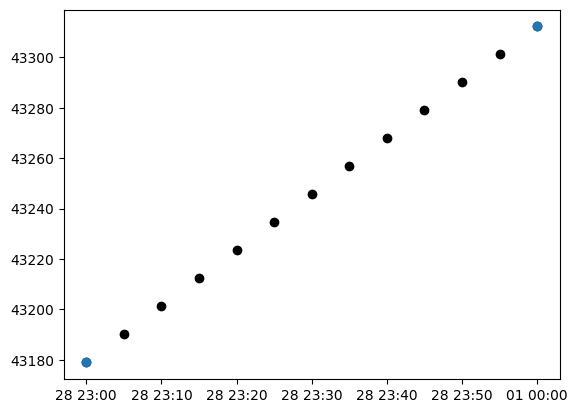

In [204]:
filter = df['date']>=pd.to_datetime('2022-02-28 23:00:00')
add_filter = add_df['date']>=pd.to_datetime('2022-02-28 23:00:00')

plt.scatter(add_df.loc[add_filter, 'date'], add_df.loc[add_filter, 'close'], color='k')
plt.scatter(df.loc[filter, 'date'], df.loc[filter, 'close'])

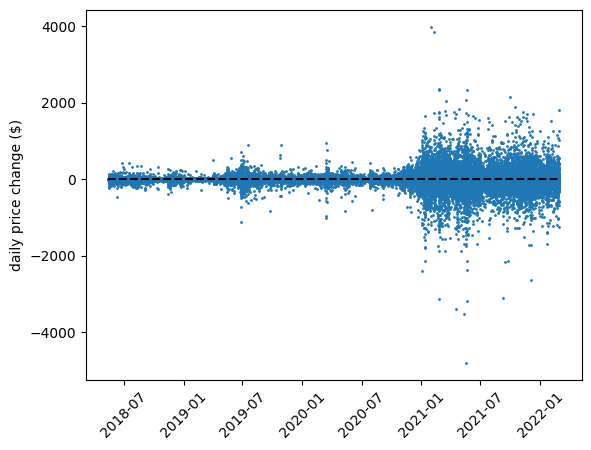

In [44]:
from matplotlib import pyplot as plt


df['daily_change'] = df['close'] - df['open']
plt.scatter(df['date'], df['daily_change'], s=1)
plt.plot([df['date'].min(), df['date'].max()], [0, 0], 'k--')
# plt.plot([df['date'].min(),df['date'].min()], [df['date'].max(), df['date'].max()]) 
# sns.scatterplot(df, x='date', y='daily_change')
plt.ylabel('daily price change ($)')
plt.xticks(rotation=45)
plt.show()

In [20]:
# change datetime format
pd.to_datetime(df['date']).dt.strftime('%y%m%d')



0        220301
1        220228
2        220228
3        220228
4        220228
          ...  
33254    180515
33255    180515
33256    180515
33257    180515
33258    180515
Name: date, Length: 33259, dtype: object